<a href="https://colab.research.google.com/github/hayannn/AIFFEL_MAIN_QUEST/blob/main/%5Bhayan%5D_mainquest_credit_card_fraud_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aiffel-ds-3-credit-card-fraud-detection/sample_submission.csv
/kaggle/input/aiffel-ds-3-credit-card-fraud-detection/train.csv
/kaggle/input/aiffel-ds-3-credit-card-fraud-detection/test.csv


# 데이터셋 준비

In [ ]:
train = pd.read_csv("/kaggle/input/aiffel-ds-3-credit-card-fraud-detection/train.csv")
test = pd.read_csv("/kaggle/input/aiffel-ds-3-credit-card-fraud-detection/test.csv")
submission = pd.read_csv("/kaggle/input/aiffel-ds-3-credit-card-fraud-detection/sample_submission.csv")

# 데이터 이해 및 탐색(EDA)

- 기본 데이터 형태 확인

### train
- 컬럼 기본 정보
  - id : 고유 숫자 부여
  - Time : 각 거래와 데이터셋의 첫 거래 사이의 경과 시간(초)
  - V1 ~ V28 : PCA로 얻은 주성분
  - Amount : 거래 금액
  - Class : 응답 변수(사기 거래인 경우 1, 그렇지 않은 경우 0) -> "Target" 데이터!

In [ ]:
train.columns

Index(['id', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# train
train.head(10)

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


- 170883행, 32열로 이루어져 있음

In [ ]:
train.shape

(170883, 32)

- train의 경우, int형 데이터 및 float형 데이터 -> 즉, 수치형 데이터만 존재
  - (데이터셋 설명 파트에서 "이 데이터셋은 PCA 변환을 거친 수치형 변수들만 포함"이라는 근거가 있음)
- 결측치는 없는 것으로 확인

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170883 entries, 0 to 170882
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      170883 non-null  int64  
 1   Time    170883 non-null  float64
 2   V1      170883 non-null  float64
 3   V2      170883 non-null  float64
 4   V3      170883 non-null  float64
 5   V4      170883 non-null  float64
 6   V5      170883 non-null  float64
 7   V6      170883 non-null  float64
 8   V7      170883 non-null  float64
 9   V8      170883 non-null  float64
 10  V9      170883 non-null  float64
 11  V10     170883 non-null  float64
 12  V11     170883 non-null  float64
 13  V12     170883 non-null  float64
 14  V13     170883 non-null  float64
 15  V14     170883 non-null  float64
 16  V15     170883 non-null  float64
 17  V16     170883 non-null  float64
 18  V17     170883 non-null  float64
 19  V18     170883 non-null  float64
 20  V19     170883 non-null  float64
 21  V20     17

In [ ]:
train.isnull().sum()

id        0
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
train.describe()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,...,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000
mean,85441.000000,61091.567090,-0.169838,0.040771,0.493037,0.117429,-0.176102,0.058235,-0.080669,0.032227,...,-0.028287,-0.083744,-0.022450,0.009008,0.092269,0.012603,0.002093,0.002445,87.336704,0.002107
std,49329.817362,27828.109419,1.850529,1.610874,1.383241,1.371910,1.338609,1.295123,1.208518,1.227630,...,0.743713,0.667318,0.584508,0.598760,0.465505,0.490660,0.391951,0.307315,245.954429,0.045851
min,0.000000,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,42720.500000,41216.500000,-0.986667,-0.539174,-0.064747,-0.743475,-0.828769,-0.691129,-0.586314,-0.162638,...,-0.230722,-0.546777,-0.170294,-0.332459,-0.195933,-0.330346,-0.065125,-0.027054,5.480000,0.000000
50%,85441.000000,60776.000000,-0.183560,0.109679,0.623352,0.124307,-0.226228,-0.202634,-0.031932,0.056664,...,-0.054462,-0.066786,-0.036211,0.059474,0.135662,-0.058966,0.008693,0.021152,21.890000,0.000000
75%,128161.500000,78622.000000,1.184446,0.804221,1.297352,0.937632,0.374445,0.449200,0.462616,0.350995,...,0.128337,0.363165,0.098707,0.415860,0.399458,0.272938,0.089727,0.078302,76.720000,0.000000
max,170882.000000,120396.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


### test

In [ ]:
# test
test.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,170883,120396.0,-2.410892,-1.264333,-0.787460,-0.212152,1.139859,-2.030200,0.533818,-0.194852,...,-0.558831,-0.076699,0.054816,-1.243901,0.147148,0.974330,1.309377,0.083660,-0.611166,124.98
1,170884,120396.0,-1.394526,0.284790,2.979226,0.362345,-1.344546,2.278858,-1.836101,-1.797895,...,-0.807798,1.945416,-0.539926,-0.446763,-0.521142,0.405680,-0.149237,0.458944,-0.071516,50.00
2,170885,120396.0,0.140378,0.989574,-0.506447,0.480553,1.407763,0.371637,0.811775,0.067702,...,0.120841,0.385872,1.302941,-0.177157,-0.192410,-0.724567,-0.433276,0.540947,0.323866,8.69
3,170886,120396.0,-1.303150,0.187865,0.944395,-1.277834,1.236744,-1.301696,1.402234,-0.558914,...,-0.251346,-0.274175,-0.656826,-0.164985,0.001284,-0.001842,-0.024050,-0.436872,0.051705,59.99
4,170887,120396.0,1.947883,-1.095332,-1.392121,-0.600598,-0.320840,0.048953,-0.443486,-0.081011,...,-0.293448,-0.250594,-0.385151,0.099030,0.221922,-0.212846,0.586637,-0.071616,-0.045475,119.97


- 테스트 데이터셋이기 때문에 위와 동일

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113923 entries, 0 to 113922
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      113923 non-null  int64  
 1   Time    113923 non-null  float64
 2   V1      113923 non-null  float64
 3   V2      113923 non-null  float64
 4   V3      113923 non-null  float64
 5   V4      113923 non-null  float64
 6   V5      113923 non-null  float64
 7   V6      113923 non-null  float64
 8   V7      113923 non-null  float64
 9   V8      113923 non-null  float64
 10  V9      113923 non-null  float64
 11  V10     113923 non-null  float64
 12  V11     113923 non-null  float64
 13  V12     113923 non-null  float64
 14  V13     113923 non-null  float64
 15  V14     113923 non-null  float64
 16  V15     113923 non-null  float64
 17  V16     113923 non-null  float64
 18  V17     113923 non-null  float64
 19  V18     113923 non-null  float64
 20  V19     113923 non-null  float64
 21  V20     11

### submission

- 추후 제출할 데이터이기 때문에, id 및 class만 존재

In [ ]:
# submission
submission.head()

,id,Class
0,170883,0
1,170884,0
2,170885,0
3,170886,0
4,170887,0


# 데이터셋 인포메이션
- Dataset Description에서 확인해보자.
  - "클래스 불균형 비율을 고려하여, 정밀도-재현율 곡선 아래 영역(AUPRC)을 사용하여 정확도를 측정할 것을 권장합니다. 불균형 분류에서는 혼동 행렬 정확도가 큰 의미가 없습니다."
  - 해당 단락에서 유추할 수 있듯 **Class** 속성은 불균형 분포를 가지고 있음!
  - 정상 거래에 비해 사기 거래가 현저히 적은 것이 대부분이기 때문에 불균형 분포를 가지는 것이 당연
    - 'Class' : 응답 변수로, 사기 거래인 경우 1, 그렇지 않은 경우 0의 값
      
<br>

- 데이터 특징
  - PCA 변환을 거친 수치형 변수만 포함
  - Vn형태의 컬럼: PCA로 얻은 주성분
  - 'Time', 'Amount'는 PCA 작업 X
    - 'Amount' : 예시 의존적 비용 민감 학습 등에 사용 가능

    

# 결측치 및 이상치는?
- 결측치는 없는 데이터이기 때문에 불필요. 또한, 결측치를 특정 데이터로 대체한 흔적도 현재는 보이지 않는 것으로 판단
- 이상치의 경우, 이상치 데이터가 있는 경우와 제거 후의 경우를 함께 확인하기 위해 현 단계에서 처리하지 않음.
  - 이상치는 IQR로 제거 예정

# 필요한 라이브러리 임포트
- 사용할 라이브러리
  - seaborn : 시각화에 필요
  - pyplot : 시각화에 필요
  - train_test_split : 테스트 데이터 생성을 위해 필요
  - StandardScaler : 빠르게 스탠다드 스케일링을 진행할 예정
  - LogisticRegression : 로지스틱 회귀 모델에 필요
  - RandomForestClassifier, GradientBoostingClassifier : 모델
  - roc_auc_score : 결과 수치를 보기 위해 필요
  

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

# 불균형 분포 데이터 Class를 확인하자
- 수치로 알 수 있듯, 정상 거래 데이터에 비해 사기 거래 데이터는 현저히 적음
- 머신러닝 모델에서는 극도로 불균형한 레이블 값 분포는 좋은 성능을 내기 어려움 -> **오버 샘플링**으로 보완
> 왜?
> - 현재 중심을 두고 봐야 하는 데이터는 사기 거래 데이터인데, 이 데이터의 양이 매우 적기 때문에 학습을 위해서는 충분한 데이터를 확보해야한다는 의견이 있기 때문
> - SMOTE를 이용해 K nearest Neighbor를 찾아 -> 이 데이터와 K개 이웃 간 차이를 일정한 값으로 만들어 값을 증식할 예정

In [ ]:
print(train['Class'].value_counts())

Class
0    170523
1       360
Name: count, dtype: int64


- 시각화해서 확인해보자
  - scatterplot 이용
  - 정상 범주에 속하는 데이터 1의 경우 그 수가 많지만, 사기 거래 데이터인 0인 경우 적게 분포하고 있음을 확인 가능

<Axes: ylabel='Class'>

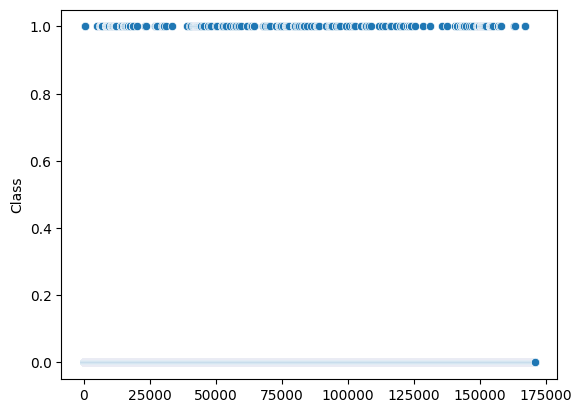

In [ ]:
sns.scatterplot(x=train.index, y=train['Class'])

# 데이터 스케일링 및 인코딩
- StandardScaler로 데이터 평균을 0, 표준 편차를 1로 맞추기
- 모델에 적용할 때 성능을 더 잘 올리기 위해서 간단히 적용

In [ ]:
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train.drop('Class', axis=1)), columns=train.columns[:-1])

- 인코딩의 경우, 주요 컬럼에서 굳이 필요하지 않다고 판단하여 진행하지 않음.

# 피쳐 엔지니어링
- 컬럼 자체가 많은 편이 아니기 때문에, 굳이 필요하지 않은 Time 컬럼을 제외하고 고려했을 때 Amount를 생각해볼 수 있음.
- Amount 값의 스케일이 다른 컬럼에 비해 큰 편이기 때문에 -> 모델이 빠르게 학습하기 어려울 수 있음

In [ ]:
train['Amount'].max()

19656.53

In [ ]:
train['Amount'].min()

0.0

- 즉, Amount를 로그 값으로 변환해서 스케일을 줄이면 모델 학습에 있어 유리할 것으로 판단!

In [ ]:
train['Amount_log'] = np.log1p(train['Amount'])

<Axes: ylabel='Amount_log'>

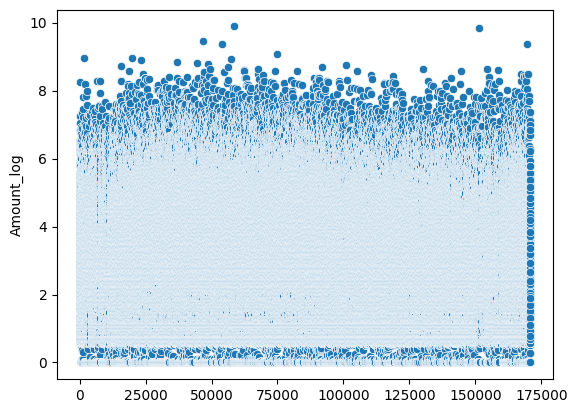

In [ ]:
sns.scatterplot(x=train.index, y=train['Amount_log'])

- 불필요한 컬럼인 Time은 삭제하기(사기 거래 예측에 필요하지 않은 데이터라 판단)
  - DataFrame을 복사해서 Time 피쳐만 삭제해서 복사한 DataFrame을 반환하기

In [ ]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

# 학습 데이터 및 테스트 데이터 세트 분리
- 본격적인 모델 학습을 위해 데이터 세트를 분리!

- `get_train_test_dataset()`
  - 위의 Time 컬럼 삭제 함수 get_preprocessed_df()를 불러오기
  - split으로 학습 및 테스트 데이터 분할
    - 테스트 데이터 세트를 전체의 30%(Stratified) 방식으로 추출해 학습 데이터 세트 및 테스트 데이터 세트 레이블 값 분포도를 최대한 동일하게 만들기
> 참고 : 교재에서는 레이블 값 분포도를 Stratified 방식으로 추출하여 유지하는데, y_target의 경우 현재 고유값도 2개 이상이며 결측치도 없지만 ValueError가 발생했었음.
> - Amout_log 컬럼을 맨 마지막에 파생 변수로 추가해서, 교재의 코드는 사용할 수 없기 때문에 X_features와 y_target을 Class 컬럼으로 정확히 명시하여 에러 삭제 완료.

In [ ]:
def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    X_features = df_copy.drop(columns=['Class'])
    y_target = df_copy['Class']

    # print("y_target 고유값 개수:", y_target.nunique())
    # print("y_target 결측값 개수:", y_target.isnull().sum())

    # 학습 및 데이터 세트 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(train)

- 학습 데이터 세트 및 테스트 데이터 세트 레이블 값 비율 확인(백분율)
  - 학습 데이터의 1 비율 : 0.210671
  - 테스트 데이터 1 비율 : 0.21067

In [ ]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
Class
0    99.789329
1     0.210671
Name: count, dtype: float64
테스트 데이터 레이블 값 비율
Class
0    99.78933
1     0.21067
Name: count, dtype: float64


# 모델을 고르자
- 로지스틱 회귀 : 해당 데이터는 분포가 선형적이기 때문에 선형 모델에 적용하면 좋은 성능을 낼 수 있을 것으로 판단
- 랜덤 포레스트 : 앙상블 학습, 해당 데이터에서의 상관관계가 일정한 특징을 띄지 않는 것으로 파악되어 복잡한 관계에서 유리한 모델도 사용해보는 것으로 판단
- LightGBM : 현재 데이터의 가장 큰 특징인 "불균형 데이터"에 가장 적합한 모델이기 때문

- 랜덤 포레스트도 사용해보려는 이유
  - 현재의 상관 행렬 계산만으로, 현 단계에서는 피쳐 간의 명확한 상관과계 수치의 이유를 파악하기 어렵다고 판단했기 때문

In [ ]:
train.columns

Index(['id', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Amount_log'],
      dtype='object')

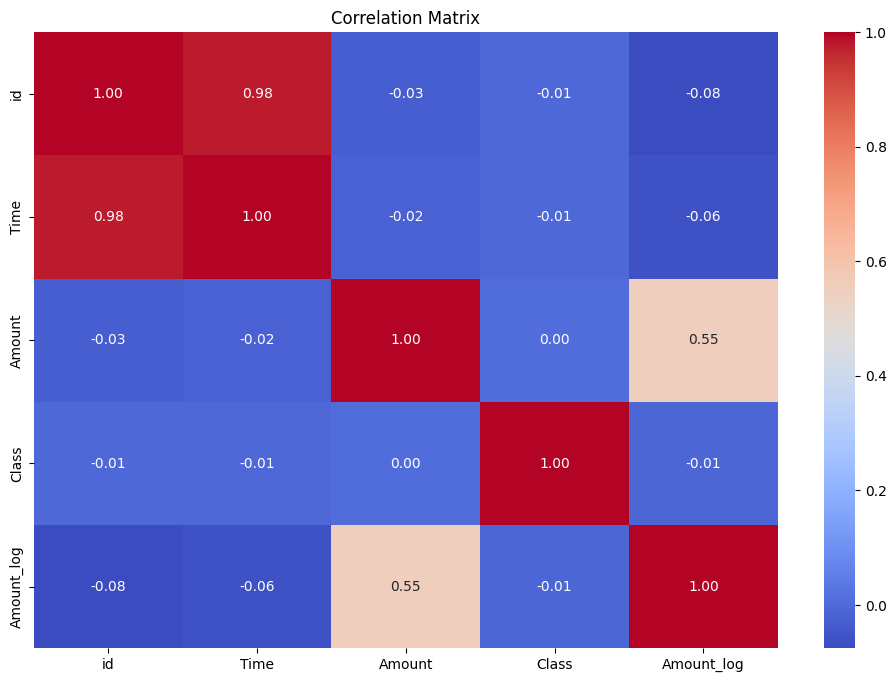

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_filtered = train.drop(columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'])

correlation_matrix = df_filtered.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()

### 로지스틱 회귀
- get_clf_eval 함수를 가져와 사용
  - 오차 행렬과 정확도, 정밀도, 재현율, F1, ROC-AUC를 보여주기 때문

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, ROC-AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[51144    13]
 [   37    71]]
정확도: 0.9990, 정밀도: 0.8452, 재현율: 0.6574,    F1: 0.7396, ROC-AUC:0.9125


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 첫 로지스틱 회귀 결과
  - 정확도: 0.9990
  - 정밀도: 0.8452
  - 재현율: 0.6574
  - F1: 0.7396
  - ROC-AUC:0.9125

### LightGBM
- Estimator 객체 및, 학습 데이터 세트 입력을 통해 학습, 예측, 평가 수행

In [ ]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [ ]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

[LightGBM] [Info] Number of positive: 252, number of negative: 119366
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029958 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7905
[LightGBM] [Info] Number of data points in the train set: 119618, number of used features: 31
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

#### 첫 LightGBM 결과
- 전체적으로 로지스틱 회귀보다 좋은 성능을 보임!
  - 정확도: 0.9996
  - 정밀도: 0.9474
  - 재현율: 0.8333
  - F1: 0.8867
  - ROC-AUC:0.9739

### 랜덤 포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
y_pred_proba = rf_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, y_pred, y_pred_proba)

오차 행렬
[[51150     7]
 [   21    87]]
정확도: 0.9995, 정밀도: 0.9255, 재현율: 0.8056,    F1: 0.8614, ROC-AUC:0.9335


#### 첫 랜덤 포레스트 결과
- 정확도: 0.9995
- 정밀도: 0.9255
- 재현율: 0.8056
- F1: 0.8614
- ROC-AUC: 0.9335

### 첫 모델 학습 결과 정리
- 모든 지표가 LightGBM > 랜덤 포레스트 > 로지스틱 회귀 순!
> LightGBM이 불균형 데이터에서 가장 사용하기 좋은 모델임을 증명함

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# 각 모델의 성능 지표 계산
print("로지스틱 회귀 성능:")
print(f"ROC-AUC: {roc_auc_score(y_test, lr_pred_proba):.4f}")
print(f"정확도: {accuracy_score(y_test, lr_pred):.4f}")
print(f"정밀도: {precision_score(y_test, lr_pred):.4f}")
print(f"재현율: {recall_score(y_test, lr_pred):.4f}")
print(f"F1: {f1_score(y_test, lr_pred):.4f}")

print("\n랜덤 포레스트 성능:")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"정확도: {accuracy_score(y_test, y_pred):.4f}")
print(f"정밀도: {precision_score(y_test, y_pred):.4f}")
print(f"재현율: {recall_score(y_test, y_pred):.4f}")
print(f"F1: {f1_score(y_test, y_pred):.4f}")


lgbm_pred = lgbm_clf.predict(X_test)
lgbm_pred_proba = lgbm_clf.predict_proba(X_test)[:, 1]

print("\nLightGBM 성능:")
print(f"ROC-AUC: {roc_auc_score(y_test, lgbm_pred_proba):.4f}")
print(f"정확도: {accuracy_score(y_test, lgbm_pred):.4f}")
print(f"정밀도: {precision_score(y_test, lgbm_pred):.4f}")
print(f"재현율: {recall_score(y_test, lgbm_pred):.4f}")
print(f"F1: {f1_score(y_test, lgbm_pred):.4f}")

로지스틱 회귀 성능:
ROC-AUC: 0.9125
정확도: 0.9990
정밀도: 0.8452
재현율: 0.6574
F1: 0.7396

랜덤 포레스트 성능:
ROC-AUC: 0.9335
정확도: 0.9995
정밀도: 0.9255
재현율: 0.8056
F1: 0.8614

LightGBM 성능:
ROC-AUC: 0.9739
정확도: 0.9996
정밀도: 0.9474
재현율: 0.8333
F1: 0.8867


### 첫 모델 학습 결과를 앙상블로 확인해보자
- Voting Classifier를 사용해서 앙상블을 구성하고, ROC-AUC를 출력
  - 앙상블 모델의 ROC-AUC : 0.9334

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score

voting_clf = VotingClassifier(estimators=[
    ('lr_clf', lr_clf),
    ('lgbm_clf', lgbm_clf),
    ('rf_clf', rf_clf)
], voting='soft')

voting_clf.fit(X_train, y_train)

y_pred_proba_voting = voting_clf.predict_proba(X_test)[:, 1]

roc_auc_voting = roc_auc_score(y_test, y_pred_proba_voting)

print(f'Voting Classifier ROC-AUC: {roc_auc_voting:.4f}')

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 252, number of negative: 119366
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078758 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7905
[LightGBM] [Info] Number of data points in the train set: 119618, number of used features: 31
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

# 데이터 분포도를 변환해서 다시 모델을 학습/예측/평가
- Amount 피쳐
  - 1000불 이하의 데이터가 대부분
  - 26,000불까지 드물지만 많은 금액을 사용한 지표가 있음 -> 꼬리가 긴 분포 곡선을 가지고 있음
- 로지스틱 회귀
  - 선형 모델이기 때문에 데이터가 정규 분포 형태를 띄는 것이 모델 성능에 좋음
  - Amount의 경우도 로지스틱 회귀에서 조금 더 데이터를 잘 받아들일 수 있도록 정규 분포 형태로 변환하기로 결정

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


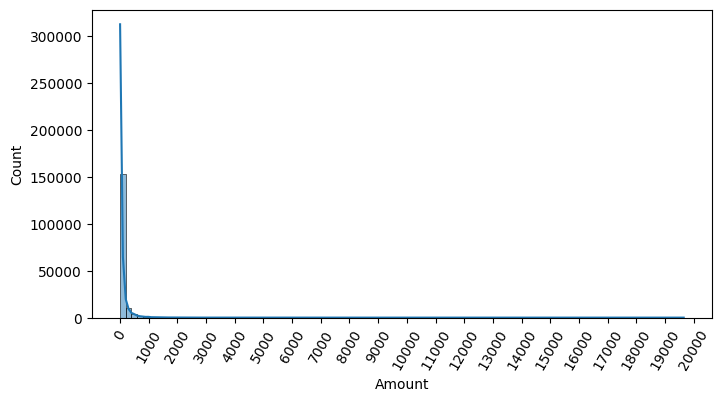

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.histplot(train['Amount'], bins=100, kde=True)
plt.show()

#### standardScaler로 Amount를 정규분포 형태로 변환
- 변환한 Amount는 Amount_Scaled로 컬럼명 변경
- 또한, 맨 앞으로 이동
- 기존의 컬럼인 Time과 Amount는 필요하지 않으므로 삭제

In [ ]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))

    df_copy.insert(0, 'Amount_Scaled', amount_n)

    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170883 entries, 0 to 170882
Data columns (total 33 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          170883 non-null  int64  
 1   Time        170883 non-null  float64
 2   V1          170883 non-null  float64
 3   V2          170883 non-null  float64
 4   V3          170883 non-null  float64
 5   V4          170883 non-null  float64
 6   V5          170883 non-null  float64
 7   V6          170883 non-null  float64
 8   V7          170883 non-null  float64
 9   V8          170883 non-null  float64
 10  V9          170883 non-null  float64
 11  V10         170883 non-null  float64
 12  V11         170883 non-null  float64
 13  V12         170883 non-null  float64
 14  V13         170883 non-null  float64
 15  V14         170883 non-null  float64
 16  V15         170883 non-null  float64
 17  V16         170883 non-null  float64
 18  V17         170883 non-null  float64
 19  V1

- 로지스틱 회귀, 랜덤 포레스트, LightGBM 재수행

In [ ]:
X_train, X_test, y_train, y_test = get_train_test_dataset(train)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### 랜덤 포레스트 예측 성능 ###')
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
y_pred_proba = rf_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, y_pred, y_pred_proba)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


오차 행렬
[[51140    17]
 [   43    65]]
정확도: 0.9988, 정밀도: 0.7927, 재현율: 0.6019,    F1: 0.6842, ROC-AUC:0.9193
### 랜덤 포레스트 예측 성능 ###
오차 행렬
[[51149     8]
 [   23    85]]
정확도: 0.9994, 정밀도: 0.9140, 재현율: 0.7870,    F1: 0.8458, ROC-AUC:0.9473
### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 252, number of negative: 119366
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7905
[LightGBM] [Info] Number of data points in the train set: 119618, number of used features: 31
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

- 로지스틱 회귀 : 정확도 하락, 정밀도 하락, 재현율 하락, F1 하락 -> ROC-AUC는 상승!
- 랜덤 포레스트 : 정확도 하락, 정밀도 하락, 재현율 하락, F1 하락 -> ROC-AUC는 상승!
- LightGBM : 정확도 -, 정밀도 하락, 재현율 하락, ROC-AUC 하락 -> F1은 상승!
> 전체적으로 큰 성능 상의 좋아짐은 느끼지 못할 수준으로 변화됨

#### Amount_Scaled를 로그로 변환하자!
- 위의 과정에서 Amount_log라는 이름으로 로그 변환을 했음(값의 스케일을 줄이기 위함)
  - 그러나, Amount_Scaled에 동일한 로그 변환값을 넣을 예정이기 때문에 로그 변환 로직 구동 후 -> 기존의 Amount_log 컬럼은 삭제 조치

In [ ]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [ ]:
train = train.drop(columns=['Amount_log'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170883 entries, 0 to 170882
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      170883 non-null  int64  
 1   Time    170883 non-null  float64
 2   V1      170883 non-null  float64
 3   V2      170883 non-null  float64
 4   V3      170883 non-null  float64
 5   V4      170883 non-null  float64
 6   V5      170883 non-null  float64
 7   V6      170883 non-null  float64
 8   V7      170883 non-null  float64
 9   V8      170883 non-null  float64
 10  V9      170883 non-null  float64
 11  V10     170883 non-null  float64
 12  V11     170883 non-null  float64
 13  V12     170883 non-null  float64
 14  V13     170883 non-null  float64
 15  V14     170883 non-null  float64
 16  V15     170883 non-null  float64
 17  V16     170883 non-null  float64
 18  V17     170883 non-null  float64
 19  V18     170883 non-null  float64
 20  V19     170883 non-null  float64
 21  V20     17

In [ ]:
X_train, X_test, y_train, y_test = get_train_test_dataset(train)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### 랜덤 포레스트 예측 성능 ###')
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
y_pred_proba = rf_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, y_pred, y_pred_proba)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


오차 행렬
[[51140    17]
 [   43    65]]
정확도: 0.9988, 정밀도: 0.7927, 재현율: 0.6019,    F1: 0.6842, ROC-AUC:0.9189
### 랜덤 포레스트 예측 성능 ###
오차 행렬
[[51151     6]
 [   22    86]]
정확도: 0.9995, 정밀도: 0.9348, 재현율: 0.7963,    F1: 0.8600, ROC-AUC:0.9521
### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 252, number of negative: 119366
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072989 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 119618, number of used features: 30
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

- 로지스틱 회귀의 모든 수치는 동일
  - 이를 통해, 해당 모델은 Amount 컬럼의 값에 지대한 영향을 받지는 않는 것으로 판단
- 랜덤 포레스트의 모든 수치는 상승
  - Amount의 로그 변환이 성능 향상에 영향을 미쳤다고 볼 수 있음
- LightGBM의 모든 수치도 상승
  - 이 역시 이유 동일(가장 많이 상승)


# 이상치 데이터를 제거하고 다시 모델을 학습/예측/평가

<Axes: >

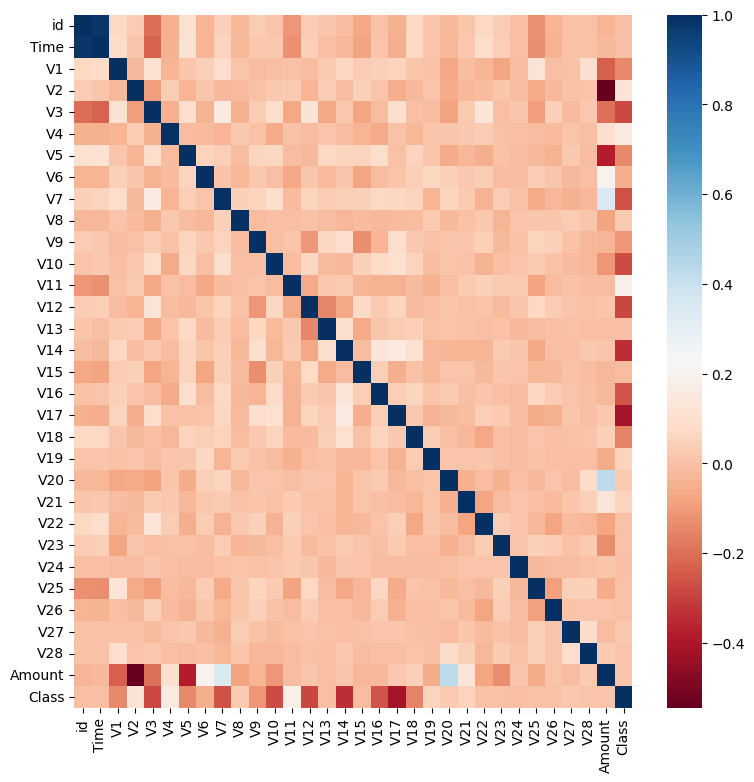

In [ ]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = train.corr()
sns.heatmap(corr, cmap='RdBu')

- Class와의 음의 상관관계 최고치 : V14, V17
- 이전에 언급했듯, 이상치 제거는 IQR을 이용!
  - V14에 대한 이상치 제거만 진행!

In [ ]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [ ]:
outlier_index = get_outlier(df=train, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Index([8296, 8615, 9035], dtype='int64')


- 이상치 추출 및 제거하는 함수 get_processed_df()
  - 로그 변환 + V14 피쳐 이상치 데이터 삭제 로직으로 변경

In [ ]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

# 모델 학습/예측/평가
X_train, X_test, y_train, y_test = get_train_test_dataset(train)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### 랜덤 포레스트 예측 성능 ###')
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
y_pred_proba = rf_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, y_pred, y_pred_proba)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


오차 행렬
[[51138    19]
 [   42    65]]
정확도: 0.9988, 정밀도: 0.7738, 재현율: 0.6075,    F1: 0.6806, ROC-AUC:0.9303
### 랜덤 포레스트 예측 성능 ###
오차 행렬
[[51151     6]
 [   18    89]]
정확도: 0.9995, 정밀도: 0.9368, 재현율: 0.8318,    F1: 0.8812, ROC-AUC:0.9422
### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 250, number of negative: 119366
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072672 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 119616, number of used features: 30
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

- 이상치 제거 이전과 이후의 성능 변화 살펴보기
  - 로지스틱 회귀 : 정확도 동일, 정밀도 하락, 재현율 상승, F1 하락, ROC-AUC 상승
  - 랜덤 포레스트 : 정확도 동일, 정밀도 상승, 재현율 상승, F1 상승, ROC-AUC 상승
  - LightGBM : 정확도 상승, 정밀도 상승, 재현율 상승, F1 상승, ROC-AUC 상승

#### 얻을 수 있는 인사이트
> - 불균형 데이터에 가장 적합하다고 알려진 LightGBM의 경우가 피쳐 데이터 가공 시에 눈에 띄는 성능 개선이 보임!!

# SMOTE 오버 샘플링 적용 후 모델 학습/예측 평가
- 주의 사항 : 학습 데이터 세트만 오버 샘플링 해야 함!
  - 검증 데이터 세트 또는 테스트 데이터 세트 오버 샘플링을 하게 되면, 결국 원본 데이터 세트가 아닌 데이터를 통해 검증이나 테스트가 수행되기 때문에 올바르게 검증하고 테스트했다고 보기 어려움..!

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (119616, 30) (119616,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (238732, 30) (238732,)
SMOTE 적용 후 레이블 값 분포: 
 Class
0    119366
1    119366
Name: count, dtype: int64


- 데이터 증식 완료
- 또한, Class의 0과 1 값이 동일하게 설정 완료됨

<br>

#### 로지스틱 회귀부터 해보자

In [ ]:
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[49028  2129]
 [   12    95]]
정확도: 0.9582, 정밀도: 0.0427, 재현율: 0.8879,    F1: 0.0815, ROC-AUC:0.9627


- 직전에 비해 정확도, 정밀도, F1이 하락했고, 재현율과 ROC-AUC는 상승
  - 재현율을 높을지언정 정밀도가 현저히 낮아졌기 때문에 이 결과는 신뢰도가 떨어질 수밖에 없음.
  - 이 모델이 실제 테스트 데이터 세트에서 예측을 Class=1에 지나치게 적용하면서 정밀도가 떨어진 것

#### 분류 결정 임곗값에 따른 정밀도와 재현율 곡선으로 문제 확인
- precision_recall_curve_plot() 함수 사용!

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)

    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

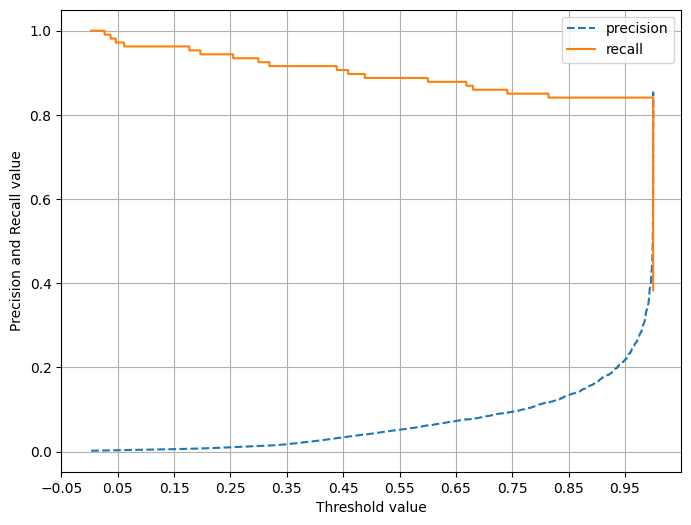

In [ ]:
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

> 지표 분석
- 임계값 0.99 이하
  - 재현율 양호, 정밀도 낮음
- 임계값 0.99 이상
  - 재현율 낮아짐 -> 정밀도 급상승
- 즉, 로지스틱 회귀의 경우 SMOTE로 오버 샘플링하는 것은 적합하지 않음을 결론으로 내릴 수 있음

#### 랜덤 포레스트

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_over, y_train_over)
y_pred = rf_clf.predict(X_test)
y_pred_proba = rf_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, y_pred, y_pred_proba)

오차 행렬
[[51148     9]
 [   16    91]]
정확도: 0.9995, 정밀도: 0.9100, 재현율: 0.8505,    F1: 0.8792, ROC-AUC:0.9657


- 직전과 비교했을 경우 정확도 동일, 정밀도 및 재현율 상승, 또한 ROC-AUC 상승
- F1 하락
  - 지표를 분석해보면 오버 샘플링을 통해 정확도가 낮아지는 문제가 생기지 않았고, 다른 모든 지표가 대부분 눈에 띌 정도로 상승했기 때문에 SMOTE를 적용하는 것에 의미가 있는 모델임을 알 수 있음!

#### LightGBM

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

[LightGBM] [Info] Number of positive: 119366, number of negative: 119366
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.142919 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 238732, number of used features: 30
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

- 직전과 비교했을 때 정확도, 정밀도, F1은 하락
- 재현율, ROC-AUC는 상승
  - 이를 통해 SMOTE를 적용하는 경우는 "재현율이 높고, 정밀도가 낮아도 되는" 경우라고 정리해볼 수 있음
  - 모델의 목표가 정밀도가 아닌 "재현율 지표"에 있다면 사용 가능할 듯!

# 앙상블로 현재 ROC-AUC 확인

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score

voting_clf = VotingClassifier(estimators=[
    ('lr_clf', lr_clf),
    ('lgbm_clf', lgbm_clf),
    ('rf_clf', rf_clf)
], voting='soft')

voting_clf.fit(X_train, y_train)

y_pred_proba_voting = voting_clf.predict_proba(X_test)[:, 1]

roc_auc_voting = roc_auc_score(y_test, y_pred_proba_voting)

print(f'[M] Voting Classifier ROC-AUC: {roc_auc_voting:.4f}')

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 250, number of negative: 119366
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071615 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 119616, number of used features: 30
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

### 이전과 비교
- 첫 모델 학습 시기와 비교하면 이전의 앙상블 모델 ROC-AUC는 0.9334
- 현재 모델은 **ROC-AUC가 0.9483**으로 상승했음을 확인할 수 있음!
  - 큰 폭으로 상승했다고 보기에는 다소 어려울 수 있으나, 데이터의 분포도를 확인해서 Amount를 로그로 변환하고, 이상치 데이터를 처리했기 때문에 모델 성능이 상승했다고 판단해볼 수 있음

# 하이퍼 파라미터 튜닝을 하자

#### 로지스틱 회귀
- C를 이용해서 -> 정규화 강도를 높여가고
- liblinear와 saga 2가지의 최적화 알고리즘을 써서(데이터셋의 크고 작음에 따름) 튜닝해보자.
- K-폴드 교차 검증으로 진행(5개)
  - CV를 5개로 지정해서 이전과 어떻게 달라지는지 확인하기

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],
#     'solver': ['liblinear', 'saga']
# }


# lr_clf = LogisticRegression()

# # 하이퍼 파라미터 튜닝
# grid_search_lr = GridSearchCV(lr_clf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
# grid_search_lr.fit(X_train, y_train)

# # 최적의 하이퍼파라미터가 무엇인지 출력
# print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)

#### 랜덤 포레스트
- 시간이 오래걸리는 문제가 있기 때문에 RandomizedSearchCV를 이용해 탐색!
- 트리 개수, 트리의 max_depth, min_samples_split를 이용한 튜닝 진행

> 이렇게 했음에도 불구하고 시간이 과도하게 오래 소요되는 문제가 있어 임의의 값으로 진행
> - Best parameters for Random Forest: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2}로 임의 설정

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# param_dist_rf = {
#     'n_estimators': [100, 200],
#     'max_depth': [10, 20],
#     'min_samples_split': [2, 5]
# }

# rf_clf = RandomForestClassifier(random_state=42)

# random_search_rf = RandomizedSearchCV(rf_clf, param_distributions=param_dist_rf,
#                                       n_iter=10, cv=3, scoring='roc_auc', n_jobs=-1, random_state=42)
# random_search_rf.fit(X_train, y_train)

# print("Best parameters for Random Forest:", random_search_rf.best_params_)

#### LightGBM
- 시간이 오래걸리는 문제가 있기 때문에 RandomizedSearchCV를 이용해 탐색!
- 리프 노드의 경우, 너무 많으면 과적합이 발생할 수 있으니, 적당하게 설정!
- 학습률도 비슷.
- 트리 개수와 max_depth도 지정

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# param_grid_lgbm = {
#     'num_leaves': [31, 64],
#     'learning_rate': [0.01, 0.05],
#     'n_estimators': [100, 200],
#     'max_depth': [5, 10]
# }

# lgbm_clf = LGBMClassifier(random_state=42)

# grid_search_lgbm = RandomizedSearchCV(lgbm_clf, param_grid_lgbm, cv=5, scoring='roc_auc', n_jobs=-1)
# grid_search_lgbm.fit(X_train, y_train)

# print("Best parameters for LightGBM:", grid_search_lgbm.best_params_)

> ## 주의
> - 최적 파라미터를 찾아내는 과정을 끝내고 명시할 것이기 때문에, 위의 3개 코드는 주석처리하여 재실행 시 다시 실행되지 않도록 할 예정(시간이 오래걸리므로)

# 최적 파라미터로 재학습

#### 로지스틱 회귀
- 하이퍼 파라미터 튜닝 이전 vs 이후
  - 정확도 : 0.9582 -> 0.9986 ⬆️
  - 정밀도 : 0.0427 -> 0.7846 ⬆️
  - 재현율 : 0.8879 -> 0.4766 ⬇️
  - F1 : 0.0815 -> 0.5930 ⬆️
  - ROC-AUC : 0.9627 -> 0.9051 ⬇️

In [ ]:
# 최적의 하이퍼파라미터
best_lr_params = {'C': 0.01, 'solver': 'liblinear'}
lr_clf_tuned = LogisticRegression(C=best_lr_params['C'], solver=best_lr_params['solver'])

lr_clf_tuned.fit(X_train, y_train)

lr_pred = lr_clf_tuned.predict(X_test)
lr_pred_proba = lr_clf_tuned.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[51143    14]
 [   56    51]]
정확도: 0.9986, 정밀도: 0.7846, 재현율: 0.4766,    F1: 0.5930, ROC-AUC:0.9051


#### 랜덤 포레스트
- 하이퍼 파라미터 튜닝 이전 vs 이후
  - 정확도 : 0.9995 -> 0.9995 -
  - 정밀도 : 0.9100 -> 0.9368 ⬆️
  - 재현율 : 0.8505 -> 0.8318 ⬇️
  - F1 : 0.8792 -> 0.8812 ⬆️
  - ROC-AUC : 0.9657 -> 0.9847 ⬆️

In [ ]:
# 최적의 하이퍼파라미터
best_rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, random_state=42)

best_rf_clf.fit(X_train, y_train)

y_pred_rf = best_rf_clf.predict(X_test)
y_pred_proba_rf = best_rf_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, y_pred_rf, y_pred_proba_rf)

오차 행렬
[[51151     6]
 [   18    89]]
정확도: 0.9995, 정밀도: 0.9368, 재현율: 0.8318,    F1: 0.8812, ROC-AUC:0.9847


#### LightGBM
- 하이퍼 파라미터 튜닝 이전 vs 이후
  - 정확도 : 0.9995 -> 0.9995 -
  - 정밀도 : 0.8911 -> 0.9175 ⬆️
  - 재현율 : 0.8411 -> 0.8318 ⬇️
  - F1 : 0.8654 -> 0.8725 ⬆️
  - ROC-AUC : 0.9793 -> 0.9819 ⬆️

In [ ]:
# 최적의 하이퍼파라미터
best_lgbm_clf = LGBMClassifier(num_leaves=31, learning_rate=0.01, n_estimators=200, max_depth=5, random_state=42)

best_lgbm_clf.fit(X_train, y_train)

y_pred_lgb = best_lgbm_clf.predict(X_test)
y_pred_proba_lgb = best_lgbm_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, y_pred_lgb, y_pred_proba_lgb)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 250, number of negative: 119366
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071829 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 119616, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002090 -> initscore=-6.168489
[LightGBM] [Info] Start training from score -6.168489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

### 결과 분석
- ROC-AUC를 기준으로 봤을 경우, 랜덤 포레스트 > LightGBM > 로지스틱 회귀 순
  - 해당 데이터는 불균형 데이터이기 때문에 그 형태에 조금 더 적합한 LightGBM을 사용하거나, 수치상으로 Best인 랜덤 포레스트를 사용할 수도 있을 것으로 결론
  - 다만, 랜덤 포레스트의 경우, 설정값에 따라 아주 오랜 시간이 소요될 수 있어 주의 요망

# 앙상블로 최종 ROC-AUC 확인

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score

voting_clf = VotingClassifier(estimators=[
    ('lr_clf', lr_clf),
    ('lgbm_clf', lgbm_clf),
    ('rf_clf', rf_clf)
], voting='soft')

voting_clf.fit(X_train, y_train)

y_pred_proba_voting = voting_clf.predict_proba(X_test)[:, 1]

roc_auc_voting = roc_auc_score(y_test, y_pred_proba_voting)

print(f'[Final] Voting Classifier ROC-AUC: {roc_auc_voting:.4f}')

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 250, number of negative: 119366
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074988 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 119616, number of used features: 30
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

### 앙상블 결과 비교(ROC-AUC)
- First : 0.9334
- Second : 0.9483
- Final : 0.9431

> 대체적으로 약 0.93에서 약 0.94까지 성능 지표를 올린 것으로 결론!

<br>

### 최종 결과 분석
- 하이퍼 파라미터 튜닝 전 : LightGBM > 랜덤 포레스트 > 로지스틱 회귀
- 하이퍼 파리미터 튜닝 후 : 랜덤 포레스트 > LightGBM > 로직스틱 회귀

> #### 즉, 이번 신용카드 사기 검출 데이터에서 가장 적합한 모델은 랜덤 포레스트 또는 LightGBM이다!!!
> - 불균형 데이터이기 때문에 LightGBM으로 선정!

# 결과 제출 파일 생성

In [ ]:
# 최적의 하이퍼파라미터
best_lgbm_clf = LGBMClassifier(num_leaves=31, learning_rate=0.01, n_estimators=200, max_depth=5, random_state=42)

best_lgbm_clf.fit(X_train, y_train)

y_pred_lgb = best_lgbm_clf.predict(X_test)
y_pred_proba_lgb = best_lgbm_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, y_pred_lgb, y_pred_proba_lgb)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 250, number of negative: 119366
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071488 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 119616, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002090 -> initscore=-6.168489
[LightGBM] [Info] Start training from score -6.168489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

In [ ]:
y_pred_lgb = best_lgbm_clf.predict(X_test)
y_pred_proba_lgb = best_lgbm_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, y_pred_lgb, y_pred_proba_lgb)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
오차 행렬
[[51149     8]
 [   18    89]]
정확도: 0.9995, 정밀도: 0.9175, 재현율: 0.8318,    F1: 0.8725, ROC-AUC:0.9819


In [ ]:
# 'Amount_Scaled' 열을 train 데이터에서 계산한 방식대로 test 데이터에 추가
test['Amount_Scaled'] = np.log1p(test['Amount'])

# 학습 데이터에서 사용한 열만 선택
train_columns = X_train.columns

# test 데이터에서 train 데이터에 있는 피처만 선택
test_selected = test[train_columns]

# 테스트 데이터에 대해 확률 예측
y_pred_proba_test = best_lgbm_clf.predict_proba(test_selected)[:, 1]  # 두 번째 클래스의 확률값 추출

# 제출 파일 생성 (id 열과 예측값을 포함)
submission = pd.DataFrame({'id': test['id'], 'Class': y_pred_proba_test})

# 제출 파일을 CSV로 저장
submission.to_csv('submission.csv', index=False)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [ ]:
submission

,id,Class
0,170883,0.000442
1,170884,0.000447
2,170885,0.000298
3,170886,0.000300
4,170887,0.000298
...,...,...
113918,284801,0.000541
113919,284802,0.000615
113920,284803,0.000379
113921,284804,0.000402
